In [81]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [82]:
# Connect to your database.
conn = sqlite3.connect('/home/sumkin/sumkin-trading/data/trades.db')
conn.row_factory = sqlite3.Row
cursor = conn.cursor()

# Number of trades.
cursor.execute("SELECT COUNT(*) FROM cointegration_pair_trades")
num_trades = cursor.fetchone()[0]

# Number of completed trades.
cursor.execute("SELECT COUNT(*) FROM cointegration_pair_trades WHERE active = 0")
num_completed_trades = cursor.fetchone()[0]

# Number of wins.
cursor.execute("SELECT COUNT(*) FROM cointegration_pair_trades WHERE active = 0 and return > 0")
num_win_trades = cursor.fetchone()[0]

# Win rate.
win_rate = num_win_trades / num_completed_trades

# Average return in pct.
cursor.execute("SELECT AVG(return_pct) FROM cointegration_pair_trades WHERE active = 0")
avg_return_pct = cursor.fetchone()[0]

# Averate return.
cursor.execute("SELECT SUM(return) FROM cointegration_pair_trades WHERE active = 0")
avg_return = cursor.fetchone()[0]

print("num_trades = {}".format(num_trades))
print("num_completed_trades = {}".format(num_completed_trades))
print("num_win_trades = {}".format(num_win_trades))
print("win_rate = {}".format(win_rate))
print("avg_return_pct = {}".format(avg_return_pct))
print("sum_return = {}".format(avg_return))

num_trades = 156
num_completed_trades = 136
num_win_trades = 82
win_rate = 0.6029411764705882
avg_return_pct = 0.02792219372192129
sum_return = -15.969185112305315


In [83]:
df = pd.read_sql_query("SELECT * FROM cointegration_pair_trades", conn)
df["enter_dt"] = pd.to_datetime(df["enter_dt"])
df["exit_dt"] = pd.to_datetime(df["exit_dt"])
df["trade_length"] = (df["exit_dt"] - df["enter_dt"]).dt.total_seconds() / 60
df.sort_values("enter_dt", ascending=True, inplace=True)
df[df["active"] == 1].head(50)

,id,symb1,symb2,hedge,coeff,sigma,enter_dt,exit_dt,side,amnt,return_pct,return,active,p1_enter,p2_enter,p1_exit,p2_exit,trade_length
67,68,PF_ETCUSD,PF_TRUMPUSD,0.242004,2.972380,0.063432,2025-10-04 11:06:09,NaT,BUY,1.0,NaN,NaN,1,19.725000,7.847000,NaN,NaN,NaN
83,84,PF_UNIUSD,PF_ATOMUSD,0.291309,1.853419,0.036896,2025-10-04 18:06:06,NaT,SELL,1.0,NaN,NaN,1,7.968000,4.108000,NaN,NaN,NaN
103,104,PF_TIAUSD,PF_SUPERUSD,0.286523,0.203622,0.014780,2025-10-05 02:05:56,NaT,SELL,1.0,NaN,NaN,1,1.542400,0.621100,NaN,NaN,NaN
107,108,PF_DOGEUSD,PF_PNUTUSD,0.830191,0.008938,0.002269,2025-10-05 06:06:00,NaT,SELL,1.0,NaN,NaN,1,0.257233,0.218690,NaN,NaN,NaN
110,111,PF_DOGEUSD,PF_CROUSD,0.808675,0.006661,0.003836,2025-10-05 07:05:58,NaT,SELL,1.0,NaN,NaN,1,0.258584,0.209700,NaN,NaN,NaN
113,114,PF_DOGEUSD,PF_MELANIAUSD,0.618404,0.023116,0.002448,2025-10-05 08:06:00,NaT,SELL,1.0,NaN,NaN,1,0.262967,0.181000,NaN,NaN,NaN
116,117,PF_NEARUSD,PF_ZROUSD,0.989226,-0.611861,0.058217,2025-10-05 09:06:01,NaT,SELL,1.0,NaN,NaN,1,3.088300,2.343500,NaN,NaN,NaN
122,123,PF_TRXUSD,PF_PYTHUSD,1.271514,-0.277033,0.002442,2025-10-05 10:06:02,NaT,BUY,1.0,NaN,NaN,1,0.341970,0.161550,NaN,NaN,NaN
129,130,PF_DYDXUSD,PF_POLUSD,0.303988,0.048778,0.001720,2025-10-05 11:06:07,NaT,BUY,1.0,NaN,NaN,1,0.638100,0.245630,NaN,NaN,NaN
132,133,PF_XRPUSD,PF_WIFUSD,0.307624,-0.150604,0.009202,2025-10-05 12:06:14,NaT,BUY,1.0,NaN,NaN,1,3.049700,0.801900,NaN,NaN,NaN


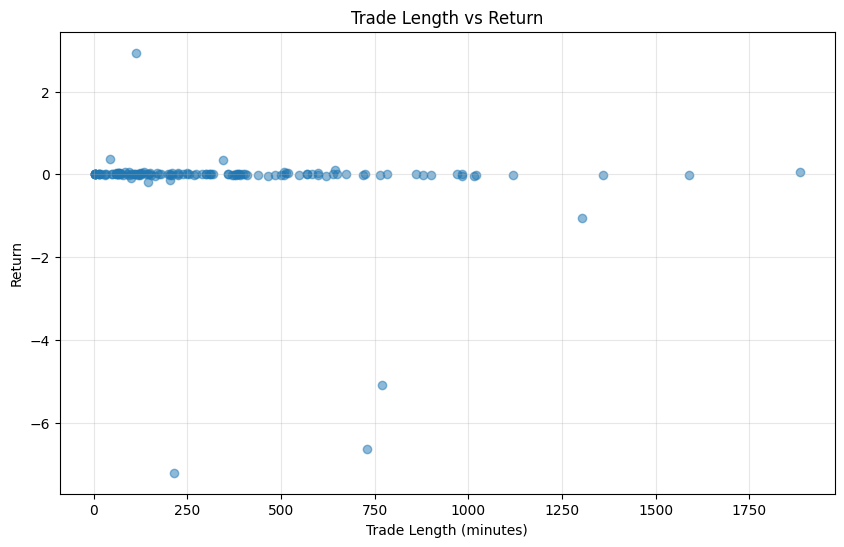

In [84]:
plt.figure(figsize=(10, 6))
plt.scatter(df["trade_length"], df["return"], alpha=0.5)
plt.xlabel("Trade Length (minutes)")
plt.ylabel("Return")
plt.title("Trade Length vs Return")
plt.grid(True, alpha=0.3)
plt.show()

#### 